# Dérivée partielle de la MSE

In [388]:
import numpy as np
import matplotlib.pylab as plt
import math

In [24]:
m = 10
X = np.linspace(-1, 1, m)
y = 10 * X - 5 + np.random.randn(m)

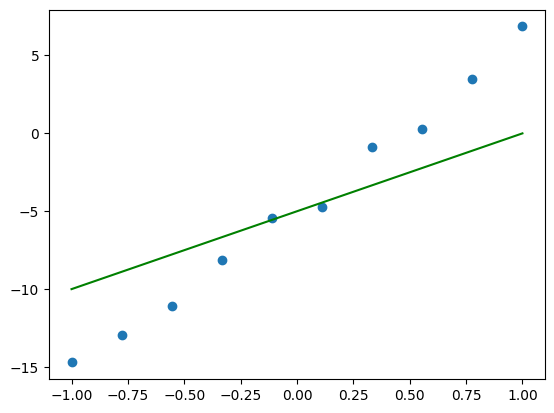

In [26]:
w = 5
b = -5

y_pred = w * X + b

plt.scatter(X, y)
plt.plot(X, y_pred, c='g')
plt.show()

In [27]:
# Fonction MSE
def mse(w, b):
    predictions = w * X + b
    errors = y - predictions
    return np.mean(errors**2)

In [38]:
# GRilles de valeurs
w_vals = np.linspace(-10, 10, 30)
b_vals = np.linspace(-15, 10, 30)

W, B = np.meshgrid(w_vals, b_vals)

In [40]:
# Calcul de la Surface MSE
Z = np.array([[mse(w, b) for w in w_vals] for b in b_vals])

Text(0.5, 0, 'MSE')

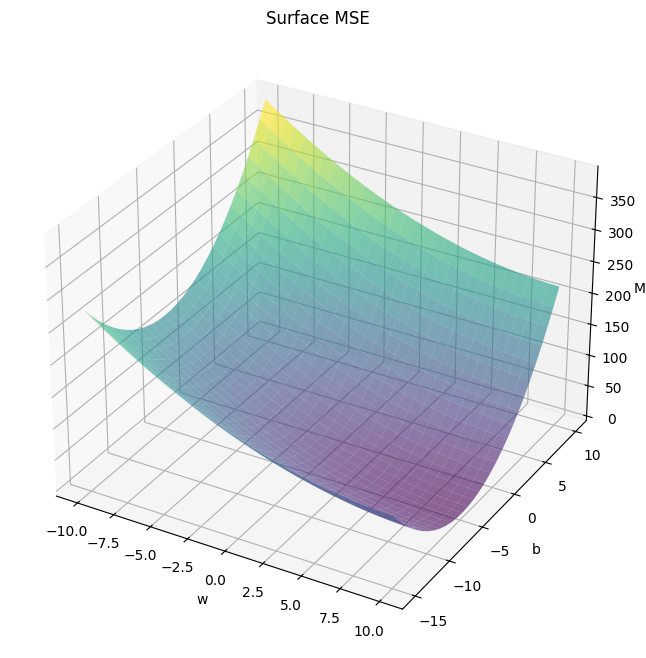

In [47]:
# Création du plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surfase MSE
ax.plot_surface(W, B, Z, alpha=0.6, cmap='viridis')

ax.set_title("Surface MSE")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("MSE")

X_1 = 7.199999999999999
X_2 = 5.52
X_3 = 4.512
X_4 = 3.9071999999999996
X_5 = 3.54432
X_6 = 3.3265919999999998
X_7 = 3.1959551999999998
X_8 = 3.11757312
X_9 = 3.070543872
X_10 = 3.0423263232
X_11 = 3.02539579392
X_12 = 3.015237476352
X_13 = 3.0091424858112
X_14 = 3.00548549148672
X_15 = 3.003291294892032
X_16 = 3.0019747769352194
X_17 = 3.0011848661611316
X_18 = 3.000710919696679
X_19 = 3.0004265518180073


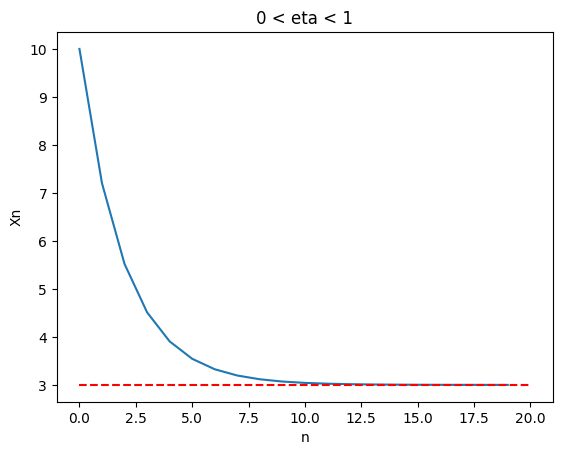

In [126]:
x0 = 10
eta = 0.2
n_iter = 20

f_prime = lambda x: 2*x - 6

x_vals = [x0]

for n in range(n_iter-1):
    x_new = x_vals[-1] - eta * f_prime(x_vals[-1])
    x_vals.append(x_new)
    print(f"X_{n+1} = {x_new}")

plt.plot(np.array(range(n_iter)), x_vals)
plt.hlines(y=3, xmin=0, xmax=n_iter, colors='r', linestyles='--')
plt.title("0 < eta < 1")
plt.xlabel("n")
plt.ylabel("Xn")
plt.show()

# Polynôme de Taylor d'ordre n --> application sur cos(x)

In [ ]:
x = [1, 2]
series = np.zeros_like(x, dtype=float)
series-=2
series

array([0., 0.])

In [256]:
def taylor_cos(x, n):
    series = np.zeros_like(x, dtype="float")
    for k in range(n + 1):
        series += (-1)**k * x**(2*k)/math.factorial(2 * k)
    return series

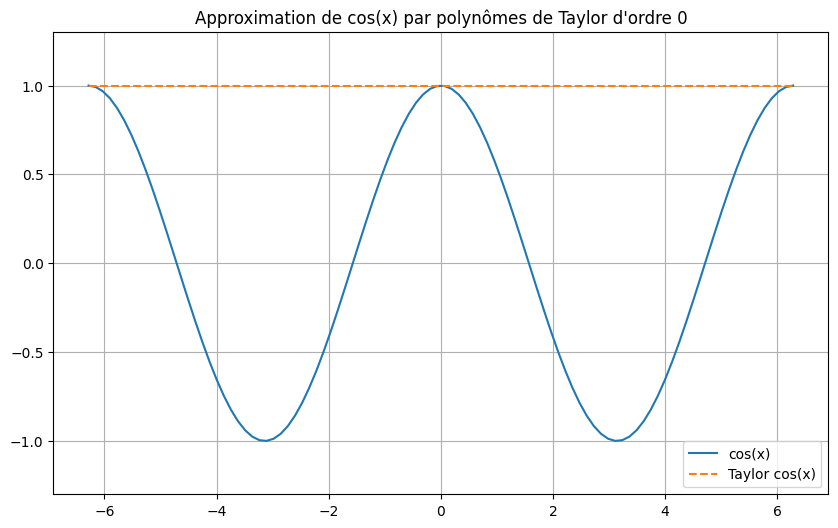

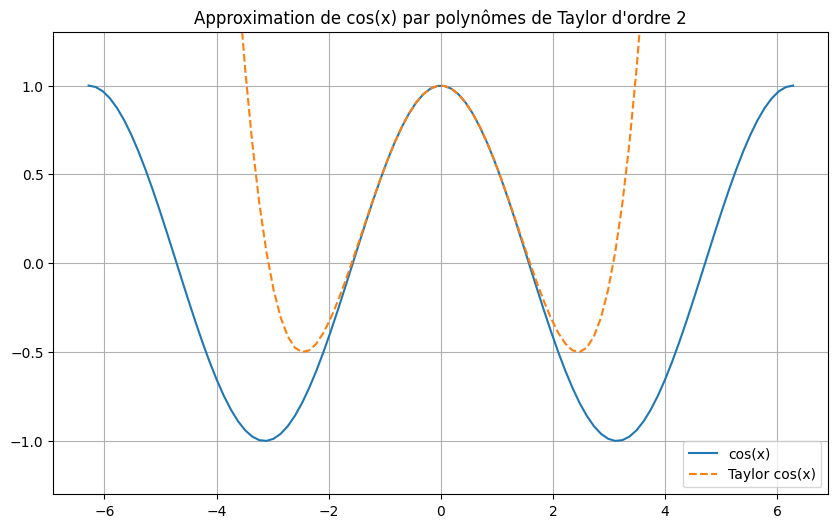

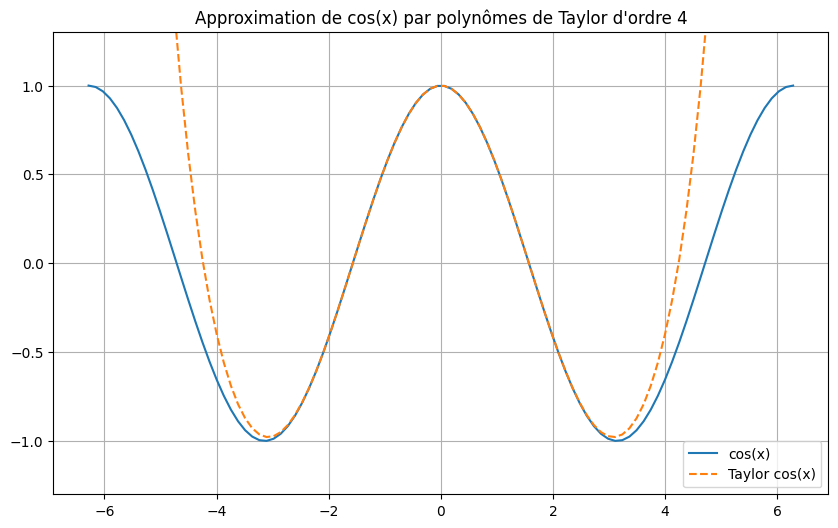

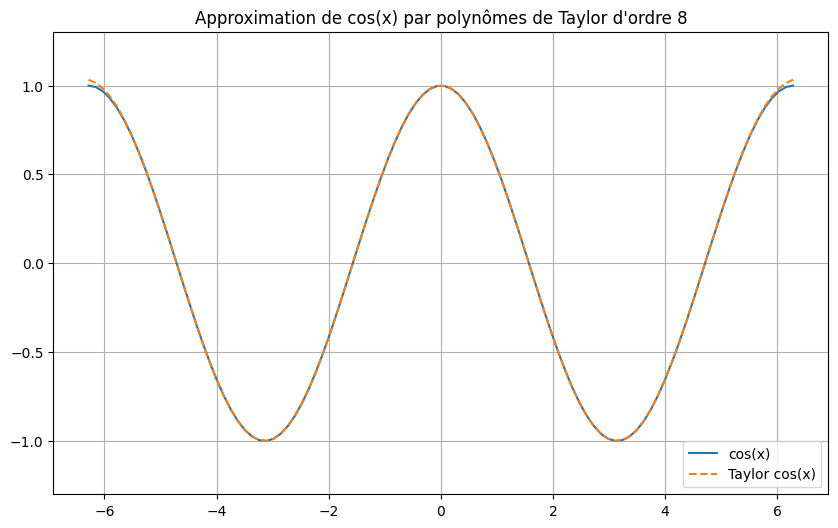

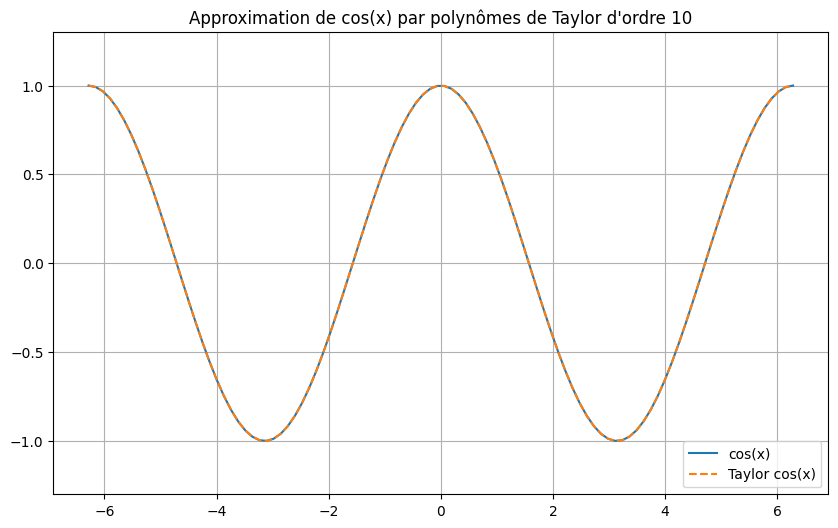

In [250]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
cos_x = np.cos(x)

# n = 1
taylor_cos_x = taylor_cos(x, 6)

orders = [0, 2, 4, 8, 10]

for n in orders:
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, cos_x, label="cos(x)")
    plt.plot(x, taylor_cos(x, n), label="Taylor cos(x)", linestyle='--')
    plt.ylim(-1.3, 1.3)
    plt.grid()
    plt.title(f"Approximation de cos(x) par polynômes de Taylor d'ordre {n}")
    plt.legend(loc="lower right")
    plt.show()

# La notion de Distance en Data science

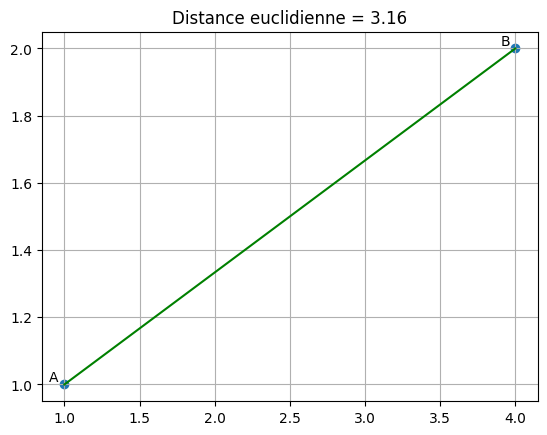

In [277]:
A = np.array([1, 1])
B = np.array([4, 2])

# Distance euclidienne
d_euc = np.linalg.norm(A - B)

fig, ax = plt.subplots()
plt.title(f"Distance euclidienne = {np.around(d_euc, 2)}")
plt.scatter([A[0], B[0]], [A[1], B[1]])
ax.annotate("A", xy=A, xytext=(A[0] - 0.1, A[1] + 0.01))
ax.annotate("B", xy=B, xytext=(B[0] - 0.1, B[1] + 0.01))
plt.plot([A[0], B[0]], [A[1], B[1]], linestyle='-', color='g')
plt.grid()

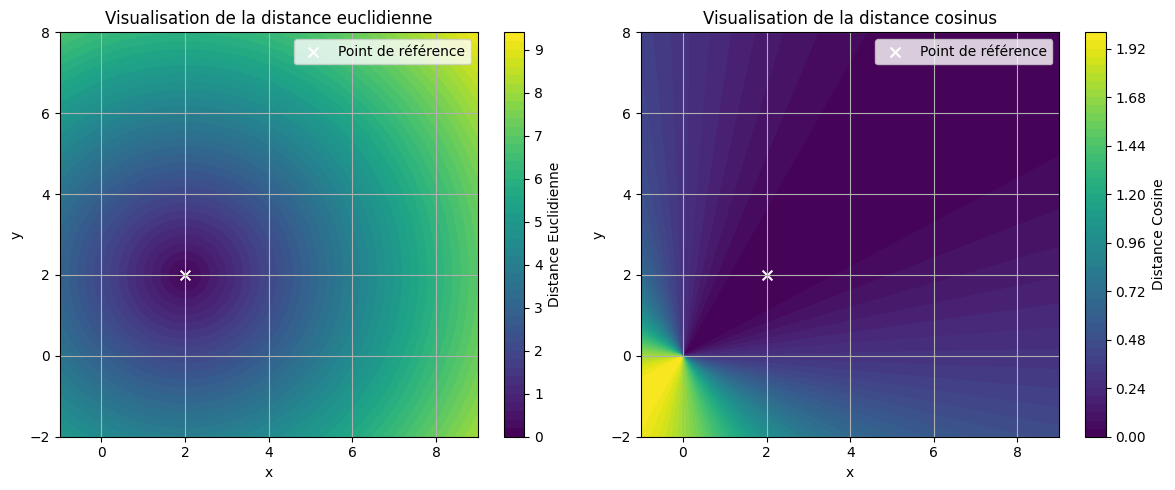

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

x_min, x_max = -1, 9
y_min, y_max = -2, 8
resolution = 200  # Résolution de la grille

# Point de référence
ref_point = np.array([2, 2])

# Créer une grille de points
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
X, Y = np.meshgrid(x, y)

def euclidean_dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2, axis=-1))

def cosine_dist(p1, p2):
    # On ajoute une petite valeur pour éviter la division par zéro
    return np.array([cosine(p1, p) if np.linalg.norm(p) > 1e-10 else 1.0 for p in p2.reshape(-1, 2)]).reshape(resolution, resolution)


points = np.stack([X, Y], axis=-1)

# Calculer les distances
euclidean_dists = euclidean_dist(ref_point, points)
cosine_dists = cosine_dist(ref_point, points)

plt.figure(figsize=(12, 5))
# Graphique pour la distance euclidienne
plt.subplot(1, 2, 1)
plt.contourf(X, Y, euclidean_dists, levels=50, cmap='viridis')
plt.colorbar(label='Distance Euclidienne')
plt.scatter(ref_point[0], ref_point[1], c='white', s=50, label='Point de référence', marker='x')
plt.title('Visualisation de la distance euclidienne')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
# Graphique pour la distance cosine
plt.subplot(1, 2, 2)
plt.contourf(X, Y, cosine_dists, levels=50, cmap='viridis')
plt.colorbar(label='Distance Cosine')
plt.scatter(ref_point[0], ref_point[1], c='white', s=50, label='Point de référence', marker='x')
plt.title('Visualisation de la distance cosinus')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.tight_layout()

plt.show()

In [321]:
u = np.array([0, 2, -1])
v = np.array([1, -1, -2])

norme_u = np.linalg.norm(u)
norme_v = np.linalg.norm(v)

produit_scalaire = np.dot(u, v)

produit_vectoriel = np.cross(u, v)

cos_theta = produit_scalaire / (norme_u * norme_v)

print("Similarité cosinus : ", cos_theta)
print("produit vectoriel :", produit_vectoriel)

2 * u - 3 * v


Similarité cosinus :  0.0
produit vectoriel : [-5 -1 -2]


array([-3,  7,  4])

In [331]:
u = np.array([[0], [1]])
u.shape

(2, 1)

# Matrice et Vecteurs

In [ ]:
i = np.array([0, 1])
m = np.array([[0, -1], [1, 0]])
m @ i

array([-1,  0])

In [ ]:
# Matrice identité
I = np.eye(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [342]:
# Matrice nulle
zeros_matrix = np.zeros((3, 2))
zeros_matrix

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [356]:
# Matrice ligne
u = np.array([[1, 2, 3]])
print(u)
print()

# Matrice colonne
v = np.array([[1], [3], [4]])
print(v)

[[1 2 3]]

[[1]
 [3]
 [4]]


In [364]:
# Matrice diagonale
D = np.diag([1, 2, 5])
D

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 5]])

In [370]:
# Matrice triangulaire
A = np.array([[1, 2, 4, 3], [2, 4, 2, 3], [3, 6, 8, 1], [2, 8, 9, 2]])

print("Matrice triangulaire supérieure")
U = np.triu(A)
print(U)

print("Matrice triangulaure inférieure")
L = np.tril(A)
print(L)

Matrice triangulaire supérieure
[[1 2 4 3]
 [0 4 2 3]
 [0 0 8 1]
 [0 0 0 2]]
Matrice triangulaure inférieure
[[1 0 0 0]
 [2 4 0 0]
 [3 6 8 0]
 [2 8 9 2]]


In [396]:
# Matrice transposée
M = np.array([[1, 0], [0, 1], [1, 1]])

G = np.array([[1, 3], [3, 1], [0, 7]])

M + G



array([[2, 3],
       [3, 2],
       [1, 8]])

In [403]:
G = np.array([[1, 2], [3, 4], [5, 6]])

H = np.array([[7, 8, 9], [10, 11, 12]])

H @ G

array([[ 76, 100],
       [103, 136]])

In [412]:
G = np.array([[1, 2], [3, 4], [5, 6]])

G

array([[1, 2],
       [3, 4],
       [5, 6]])

In [406]:
G_T = np.array([[1, 3, 5], [2, 4, 6]])
G_T

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
B = G @ G_T # Donne une matrice symétrique
B

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [415]:
trace = np.trace(B)
trace

np.int64(91)

In [421]:
F = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
F

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
rang = np.linalg.matrix_rank(F) # Il y a deux colonnes linéairment indépendantes
rang

np.int64(3)

In [422]:
F

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [458]:
det_F = np.linalg.det(F)
det_F

np.float64(-9.51619735392994e-16)

In [513]:
A = np.array([[2, 1, 3], [0, -1, 4], [5, 2, 0]], dtype="float")

det_A_avant = np.linalg.det(A)
print("Déterminant avant le transformation =", det_A_avant)

A[-1,:] = A[-1,:] - (5/2) * A[0,:]

det_A_apres = np.linalg.det(A)
print("Déterminant après le transformation =", det_A_apres)


print(f"Déterminant de la matrice transposée de A = {np.linalg.det(A.T)}")

Déterminant avant le transformation = 18.999999999999996
Déterminant après le transformation = 19.000000000000004
Déterminant de la matrice transposée de A = 18.999999999999996


In [518]:
# 1 
det = np.linalg.det(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
det

#2



np.float64(-9.51619735392994e-16)

In [521]:
A = np.array([[1, 4], [3, 1]])

Ainv = np.linalg.inv(A)
Ainv

array([[-0.09090909,  0.36363636],
       [ 0.27272727, -0.09090909]])

In [524]:
A @ Ainv

array([[ 1.00000000e+00, -2.22044605e-16],
       [ 1.11022302e-16,  1.00000000e+00]])

In [540]:
T = np.random.randint(-10, 11, size=(40, 4))


TtT = T.T @ T

TtT_inv = np.linalg.inv(TtT)


L = TtT_inv @ T.T # Inverse gauche de la matrice T

L @ T

array([[ 1.00000000e+00,  5.20417043e-17, -1.04083409e-16,
         3.46944695e-17],
       [-2.77555756e-17,  1.00000000e+00,  0.00000000e+00,
        -2.77555756e-17],
       [-2.77555756e-17,  5.55111512e-17,  1.00000000e+00,
         0.00000000e+00],
       [-1.38777878e-17, -1.38777878e-17,  0.00000000e+00,
         1.00000000e+00]])

In [548]:
A = np.array([[1, 4], [2, 8]])

A_pinv = np.linalg.pinv(A)

A @ A_pinv

array([[0.2, 0.4],
       [0.4, 0.8]])

In [552]:
A = np.array([[1, 2], [3, 4], [5, 6]])

B = np.array([5, 6, 7]) 

# Pseudo-Inverse

A_pinv = np.linalg.pinv(A)

X = A_pinv @ B

X

array([-4. ,  4.5])

In [566]:
M = np.array([[0, 2, -1], [3, -2, 0], [-2, 2, 1]])


valeurs_propores, vecteurs_propres = np.linalg.eig(M)

print(f"Valeurs propres : {valeurs_propores}")
print(f"Vecteurs propres : {vecteurs_propres}")

Valeurs propres : [-4.  2.  1.]
Vecteurs propres : [[ 0.48507125 -0.74278135  0.57735027]
 [-0.72760688 -0.55708601  0.57735027]
 [ 0.48507125  0.37139068  0.57735027]]


In [569]:
M = np.array([[0, 2, -1], [3, -2, 0], [-2, 2, 1]])

trace_M = np.trace(M)
det_M = np.linalg.det(M)

print(f"Trace de M : {trace_M}")
print(f"Détermonant de M : {det_M}")

# Produit et somme des valeurs propres 
valeurs_propres, _ = np.linalg.eig(M)
produit_valeurs_propres = np.prod(valeurs_propres)
somme_valeurs_propres = np.sum(valeurs_propres)

print()
print(f"Somme de valeurs propres de M : {somme_valeurs_propres}")
print(f"Produit de valeurs propres de M : {produit_valeurs_propres}")

np.isclose(trace_M, somme_valeurs_propres)

Trace de M : -1
Détermonant de M : -8.000000000000002

Somme de valeurs propres de M : -0.9999999999999987
Produit de valeurs propres de M : -8.000000000000004


np.True_